In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as LR
import sklearn

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/2018_Graduate/3D/'

In [3]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(3)]
csv_list = ['census', 'mobile']

In [4]:
csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            df = pd.read_csv(root_dir + _dir + 'seed' + _seed + '_' + _csv + '.csv',
                                                index_col=0,
                                                encoding='Shift_JISx0213')
            csv_array[_dir][_seed][_csv] = df

In [5]:
# なぜかこの時だけ21600がないので0で補間する
csv_array['people10000']['123']['census']['21600'] = 0

In [6]:
times_list = [str(3600 * (i + 1)) for i in range(6)]

In [7]:
people = 'people20000'
seed = '125'
csv = 'census'
time = '21600'

In [8]:
X = csv_array[people][seed]['mobile']
Y = csv_array[people][seed]['census']

# 時間帯ごとの回帰直線

In [10]:
pred_array = pd.DataFrame()

for _times in times_list:
    x = X[_times].values.reshape(-1, 1)
    y = Y[_times].values.reshape(-1, 1)
    
    model = LR()
    model.fit(x, y)
    pred = pd.DataFrame(model.predict(x), columns=[_times])
    pred_array = pd.concat([pred_array, pred], axis=1)
    
    print(_times)
    print(model.score(x, y))
    print('\n')

3600
0.8823330158770173


7200
0.7754004234188733


10800
0.9365777060366849


14400
0.80730374142001


18000
0.8465934011608863


21600
0.7182306034310431




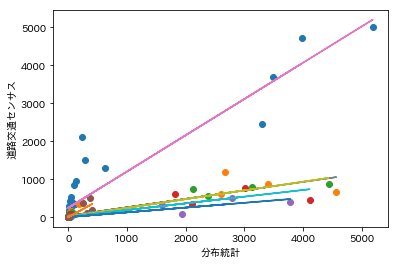

In [12]:
plt.plot(X, Y, 'o')
plt.plot(X, pred_array)
plt.xlabel('分布統計')
plt.ylabel('道路交通センサス')
# plt.savefig('corr.png')

# 全体の回帰直線

In [13]:
X = pd.DataFrame()
Y = pd.DataFrame()
df = csv_array[people][seed].copy()

for _times in times_list:
    X = pd.concat([X, df['mobile'][_times]])
    Y = pd.concat([Y, df['census'][_times]])

0.48196826992815034


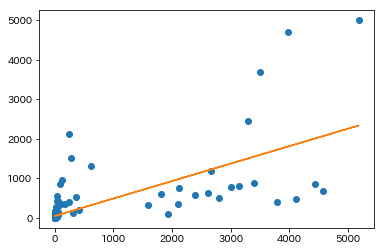

In [14]:
model = LR()
model.fit(X, Y)
print(model.score(X, Y))
pred = model.predict(X)
plt.plot(X, Y, 'o')
plt.plot(X, pred)